# Práctica 01 del 05 de Septiembre de 2019
# Computación Concurrente
# José de Jesús Tapia López

1) Crea un proceso que construya 5 procesos hijos. "Capturar" los id's de los procesos hijos y crea una tabla


In [1]:
import multiprocessing #importamos multiprocessing
import os #importamos os
import time
#Hacemos uso de la función Process() para crear un proceso

#Definimos una función hijo que imprimirá el valor de su padre, su PID y su nombre
def FuncionHijo():
    
    # Vamos a imprimir los valores del hijo
    # multiprocessing.current_process().name -->> Imprimirá el nombre del proceso actual
    # multiprocessing.current_process().pid -->> Imprimirá el PID del proceso actual
    # os.getppid() -->> Imprimirá el padre del proceso actual
    # '\t' -> simplemente es un tabulador, para dar espacio entre los datos  d1_____d2
    print(multiprocessing.current_process().name,'\t',multiprocessing.current_process().pid,'\t', os.getppid())
    
    time.sleep(5) #Le damos 5 segundos de pausa

#Definimos la función MAIN, que será nuestra función principal
def main():
    
    # Imprimimos las cabeceras de lo que sera nuestra 'tabla'
    print('Nombre\t\t','Pid\t','PID Padre')
    
    #Creamos un ciclo que realizará la creación de 5 proceso hijos
    for i in range(5):
        
        # Creamos una cadena que mandará el dato del proceso y el número, deacuerdo al contador
        # Le sumamos 1 para no tener el proceso 0
        # str (args) convierte args a cadena
        nombre = 'Proceso '+str(i+1)+":"
        
        #Realizamos la creación de un proceso hijo que hace las tareas de FUNCION HIJO con nombre NOMBRE
        proceso = multiprocessing.Process(target=FuncionHijo, name=(nombre)) 
        
        #Inicializamos el proceso
        proceso.start()
        
        #Le damos prioridad al proceso
        proceso.join()
        
#Hacemos el llamado a la función principal MAIN  
main()

Nombre		 Pid	 PID Padre
Proceso 1: 	 5815 	 5791
Proceso 2: 	 5818 	 5791
Proceso 3: 	 5822 	 5791
Proceso 4: 	 5825 	 5791
Proceso 5: 	 5830 	 5791


2) Crea un procesa que cree dos procesos hijos:
* A) Un proceso hijo crea la gráfica de $f(x) = x^2 + x - 2$
* B) El otro proceso hijo crea la gráfica $g(x) = x^3 -2x^2+x+1$
* C) Calcula tiempos versión secuencial, versión concurrente


In [2]:
from multiprocessing import Process
from multiprocessing import Pool
from multiprocessing import current_process

import time

import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10,10,100)

def hijo1(x):
    y = x**3 - 2*x**2 + x + 1
    time.sleep(2)
    plt.plot(x,y)

def hijo2(x):
    y = x**2 + x - 2
    time.sleep(2)
    plt.plot(x,y)

## Versión secuencial

Tiempo de ejecución 4.352611303329468


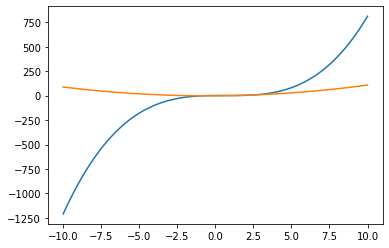

In [3]:
t0 = time.time()

fig1 = hijo1(x)
fig2 = hijo2(x)

tf = time.time()

print(f"Tiempo de ejecución {tf-t0}")

## Versión concurrente

In [ ]:
t0 = time.time()

proceso1 = Process(target=hijo1, args=(x,))
proceso2 = Process(target=hijo2, args=(x,))

proceso1.start()
proceso2.start()

proceso1.join()
proceso2.join()

tf = time.time()
print(f"Tiempo de ejecución {tf-t0}")

In [ ]:
3)

In [4]:
import multiprocessing as mp
import time 

def disminuir(a):
    while (a>0):
        a=a-1
def secuencial(a):
    t=time.time()
    while (a>0):
        a=a-1
    return time.time()-t

t1=time.time()
p1=mp.Process(target=disminuir, args=((10**6)/2,))
p1.start()
p1.join()

print("tiempo de ejecucion de a =", time.time()-t1)


t2=time.time()
p2=mp.Process(target=disminuir, args=((10**6)/2,))
p2.start()
p2.join()

print("tiempo de ejecucion de b =", time.time()-t2)

print("tiempo de ejecucion de secuencial =", secuencial(10**6))
    

tiempo de ejecucion de a = 0.1372084617614746
tiempo de ejecucion de b = 0.12752318382263184
tiempo de ejecucion de secuencial = 0.18059897422790527


In [5]:
import multiprocessing as mp
import time 

def disminuir(a):
    while (a>0):
        a=a-1
        
def secuencial(a):
    t=time.time()
    while (a>0):
        a=a-1
    return time.time()-t

t=time.time()

p1=mp.Process(target=disminuir, args=((10**6)/2,))
p2=mp.Process(target=disminuir, args=((10**6)/2,))


p1.start()
p2.start()

p1.join()
p2.join()


print("tiempo de ejecucion de a y b = ", time.time()-t)

print("tiempo de ejecucion de secuencial =", secuencial(10**6))

tiempo de ejecucion de a y b =  0.1883251667022705
tiempo de ejecucion de secuencial = 0.1551513671875
